# EDA - Exploratory Data Analysis   
- Distribution of the target variable (days_in_shelter)
- Exploring and visualizing the other features distributions
- Computing the correlation between target variable and the other variables

In [85]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from From_Shelter_to_Love.data_provisoria import get_data

In [87]:
#Getting the data

df = get_data()
df.head(2)

,Animal ID,Intake Type,Intake Condition,Animal Type,Breed,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_intake_years,age_upon_outcome_months,age_upon_outcome_years,neutered_or_spayed,male_or_female,group_color
0,A006100,Public Assist,Normal,Dog,Mixed,Return to Owner,2.0,72.0,6.0,72.0,6.0,1,1.0,Yellow
1,A047759,Owner Surrender,Normal,Dog,Dachshund,Transfer,5.0,120.0,10.0,120.0,10.0,1,1.0,Tricolor


## Exploring target variable (days_in_shelter)   
- Compute simple statistics for the target variable (min, max, mean, std, etc)
- Plot distributions

In [88]:
df.days_in_shelter.describe()

count    102725.000000
mean         19.717089
std          42.652623
min           1.000000
25%           3.000000
50%           6.000000
75%          18.000000
max        1522.000000
Name: days_in_shelter, dtype: float64

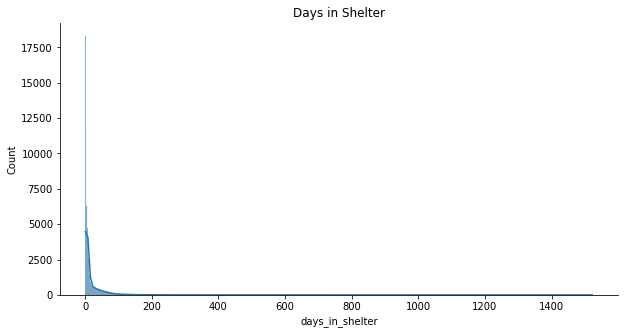

In [89]:
def plot_dist(series=df["days_in_shelter"], title="Days in Shelter"):
    fig, axs = plt.subplots(figsize = [10,5])
    sns.histplot(series, kde=True, discrete=True, ax = axs)
    sns.despine()
    plt.title(title);
    plt.show()
plot_dist()

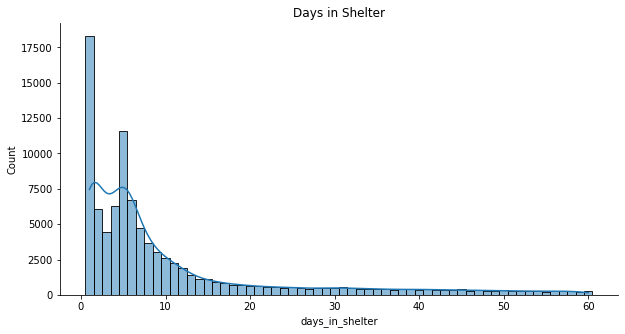

In [90]:
# drop absurd values 
plot_dist(df[df.days_in_shelter.between(0, 60)]['days_in_shelter'])

In [91]:
#Let's visualize our target in bins

def bins(df, column):
    bins = []
    for row in df[column]:
        if row in range(0,16):
            bins.append('[0,15]')
        elif row in range(16,31):
            bins.append('[16,30]')
        elif row in range(31,61):
            bins.append('[31,60]')
        else:
            bins.append('[+60]')
    return bins

In [92]:
df['day_bins'] = bins(df,'days_in_shelter')

In [93]:
df.head(2)

,Animal ID,Intake Type,Intake Condition,Animal Type,Breed,Outcome Type,days_in_shelter,age_upon_intake_months,age_upon_intake_years,age_upon_outcome_months,age_upon_outcome_years,neutered_or_spayed,male_or_female,group_color,day_bins
0,A006100,Public Assist,Normal,Dog,Mixed,Return to Owner,2.0,72.0,6.0,72.0,6.0,1,1.0,Yellow,"[0,15]"
1,A047759,Owner Surrender,Normal,Dog,Dachshund,Transfer,5.0,120.0,10.0,120.0,10.0,1,1.0,Tricolor,"[0,15]"


Animal ID                   object
Intake Type                 object
Intake Condition            object
Animal Type                 object
Breed                       object
Outcome Type                object
days_in_shelter            float64
age_upon_intake_months     float64
age_upon_intake_years      float64
age_upon_outcome_months    float64
age_upon_outcome_years     float64
neutered_or_spayed           int64
male_or_female             float64
group_color                 object
dis-bin                     object
dtype: object

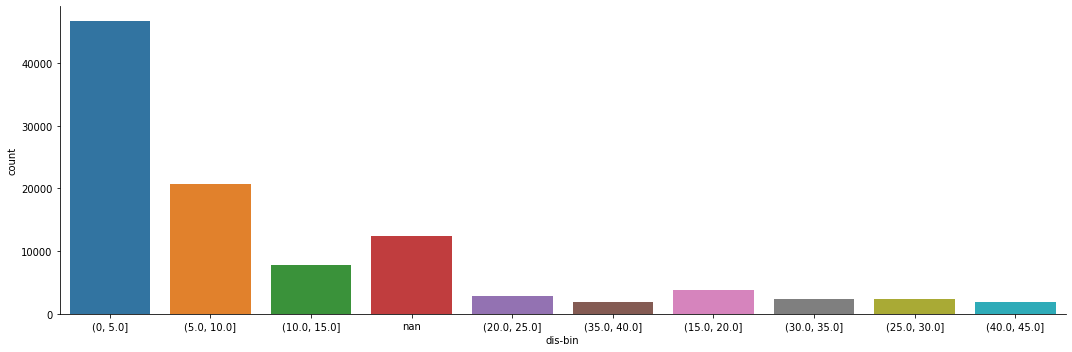

In [52]:
sns.catplot(x="dis-bin", kind="count", data=df, height=5, aspect=3);
sns.despine()
plt.show()

## Evaluation Metric   
At this moment, we are going to evaluate our model with RMSE.

In [10]:
def compute_rmse(y_pred, y_true):
    return np.sqrt(((y_pred - y_true)**2).mean())

## Baseline Model   
- Baseline Model with RMSE and utilizing the mean as prediction
- Generate predictions based on a simple heuristic
- Evaluate the RMSE for these predictions

In [11]:
df['y_pred'] = df_cleaned['fare_amount'].mean()

compute_rmse(df['y_pred'], df['fare_amount'])

NameError: name 'df_cleaned' is not defined

In [ ]:
df['y_pred'] = df['days_in_shelter'].mean()

#RMSE
compute_rmse(df['y_pred'], df['days_in_shelter'])